# Telecom Customer Churn Analysis Project

## Project Overview
This project analyzes customer churn in a telecommunications company to identify key factors contributing to customer churn and provide actionable recommendations for reducing churn rates.

## Objectives
1. Identify factors that influence customer churn
2. Develop a predictive model for customer churn
3. Provide actionable recommendations to reduce churn

In [ ]:
"""
Note: To run this notebook, you'll need to:
1. Download your kaggle.json file from your Kaggle account
2. Upload it to this Colab environment
3. Run the setup cells
4. Remove the kaggle.json file after dataset download for security
"""

In [1]:
# Step 1: Set up the Colab environment and import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Set up the Kaggle API

# Install Kaggle
!pip install kaggle

# Upload kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bbiaggi88","key":"7d13277c7f217e589d70f4c07b8b2191"}'}

In [3]:
# Set up the Kaggle credentials in Colab
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Download the Telco Customer Churn dataset
!kaggle datasets download -d blastchar/telco-customer-churn

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 39.8MB/s]


In [5]:
# Unzip the downloaded file
!unzip telco-customer-churn.zip

Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [6]:
# Step 2: Load and explore the dataset

# Load the dataset into a Pandas DataFrame
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [7]:
# Creating a copy of the DataFrame
df_copy = df.copy()

In [8]:
# Display basic information about the dataset
print(df_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Show the first few rows
df_copy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
# Display summary statistics
print(df_copy.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [11]:
# Check for missing values
print(df_copy.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [12]:
# Step 3: Data cleaning and preprocessing

# Convert 'TotalCharges' to numeric, replacing empty strings with NaN
df_copy['TotalCharges'] = pd.to_numeric(df_copy['TotalCharges'], errors='coerce')

# Drop rows with missing values
df_copy.dropna(inplace=True)

# Convert categorical variables to numeric
df_copy['gender'] = df_copy['gender'].map({'Female': 0, 'Male': 1})
df_copy['Partner'] = df_copy['Partner'].map({'No': 0, 'Yes': 1})
df_copy['Dependents'] = df_copy['Dependents'].map({'No': 0, 'Yes': 1})
df_copy['PhoneService'] = df_copy['PhoneService'].map({'No': 0, 'Yes': 1})
df_copy['PaperlessBilling'] = df_copy['PaperlessBilling'].map({'No': 0, 'Yes': 1})
df_copy['Churn'] = df_copy['Churn'].map({'No': 0, 'Yes': 1})

# Perform one-hot encoding for categorical variables with multiple categories
categorical_columns = ['InternetService', 'Contract', 'PaymentMethod']
df_copy = pd.get_dummies(df_copy, columns=categorical_columns)

<ipython-input-13-150f8297c13e>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


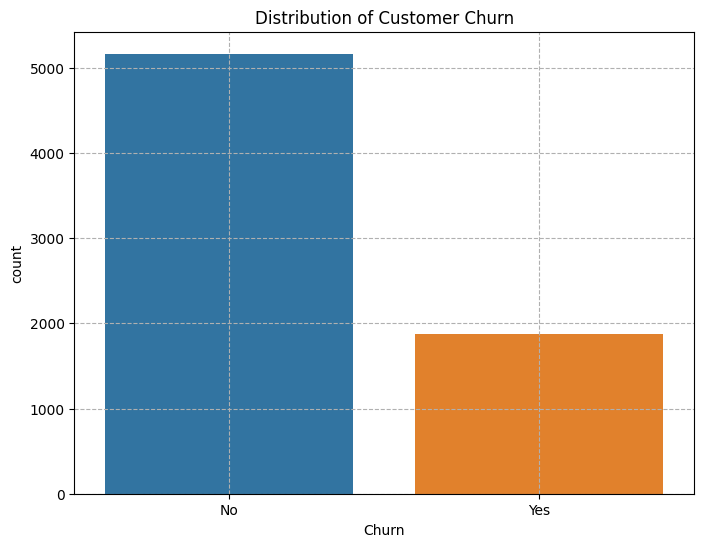

<ipython-input-13-150f8297c13e>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_1.set_xticklabels(['No', 'Yes'])


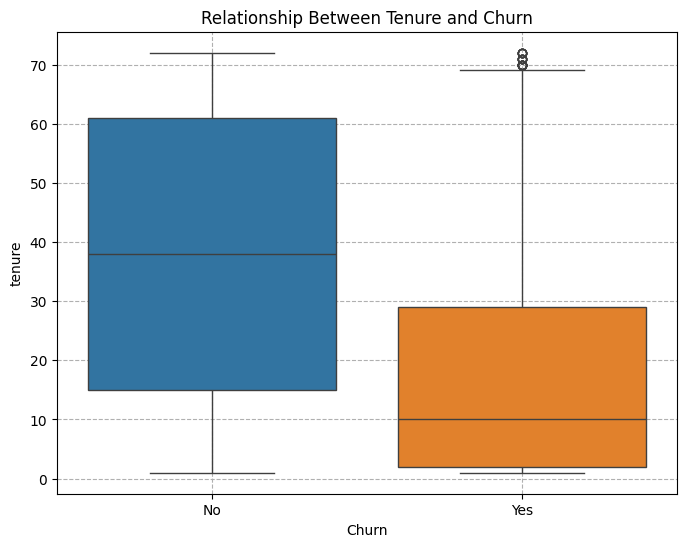

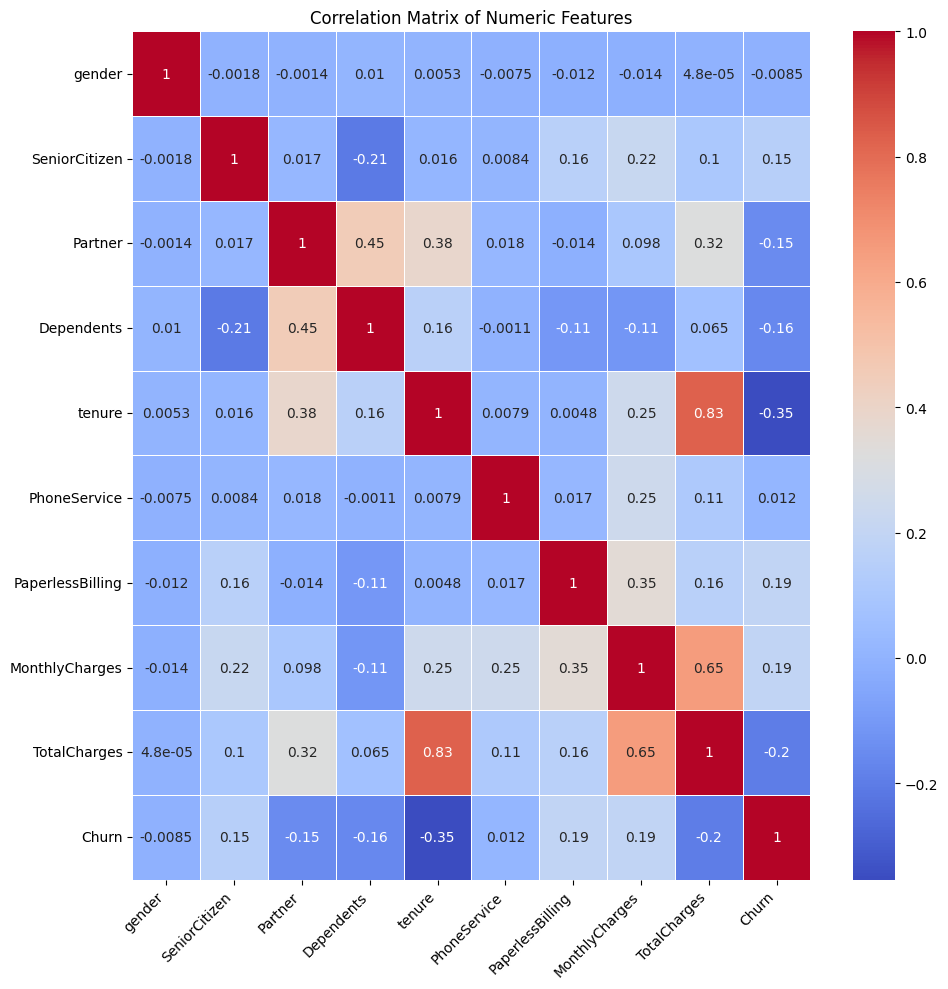

In [13]:
# Step 4: Exploratory Data Analysis (EDA)

# Visualize the distribution of customer churn
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Churn', data=df_copy, hue='Churn', legend=False)
plt.title('Distribution of Customer Churn')
ax.set_xticklabels(['No', 'Yes'])
plt.grid(linestyle='--')
plt.show()

# Analyze the relationship between tenure and churn
plt.figure(figsize=(8, 6))
ax_1 = sns.boxplot(x='Churn', y='tenure', data=df_copy, hue='Churn', legend=False)
plt.title('Relationship Between Tenure and Churn')
ax_1.set_xticklabels(['No', 'Yes'])
plt.grid(linestyle='--')
plt.show()
print()

# Visualize the correlation matrix

# First identify numeric columns
numeric_columns = df_copy.select_dtypes(include=['int64', 'float64']).columns

# Create correlation matrix for numeric columns only
correlation_matrix = df_copy[numeric_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

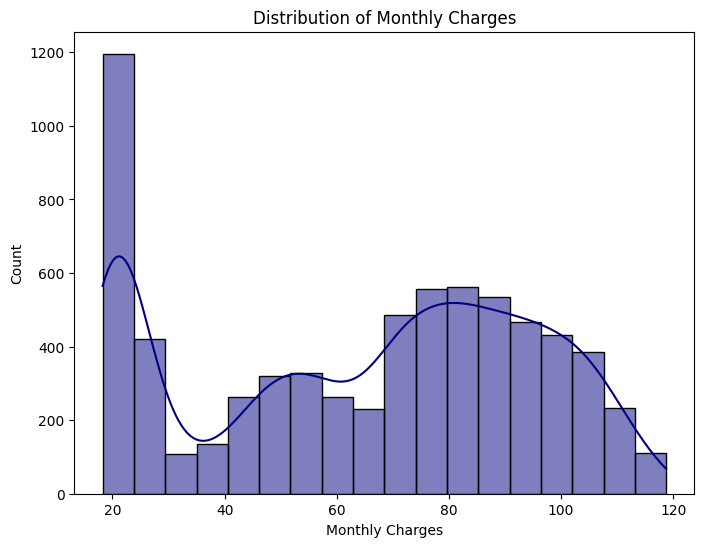

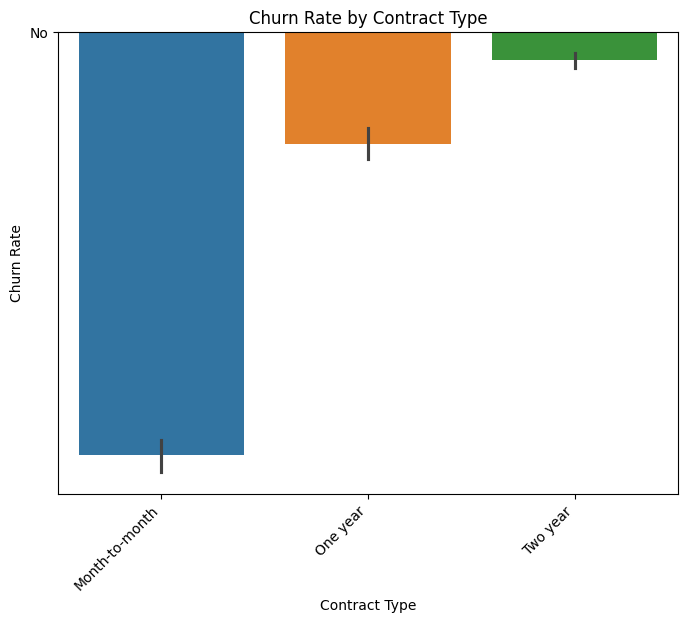

In [14]:
# Distribution of monthly charges
plt.figure(figsize=(8, 6))
sns.histplot(df_copy['MonthlyCharges'], kde=True, color="navy")
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.show()
print()

# Churn rate by contract type
plt.figure(figsize=(8, 6))
sns.barplot(x='Contract', y='Churn', data=df, hue='Contract')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

In [15]:
# Step 5: Feature selection and model training

# Select features for the model
features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'Partner', 'Dependents',
            'PhoneService', 'PaperlessBilling', 'InternetService_DSL', 'InternetService_Fiber optic',
            'Contract_One year', 'Contract_Two year', 'PaymentMethod_Electronic check']

X = df_copy[features]
y = df_copy['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.64      0.52      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



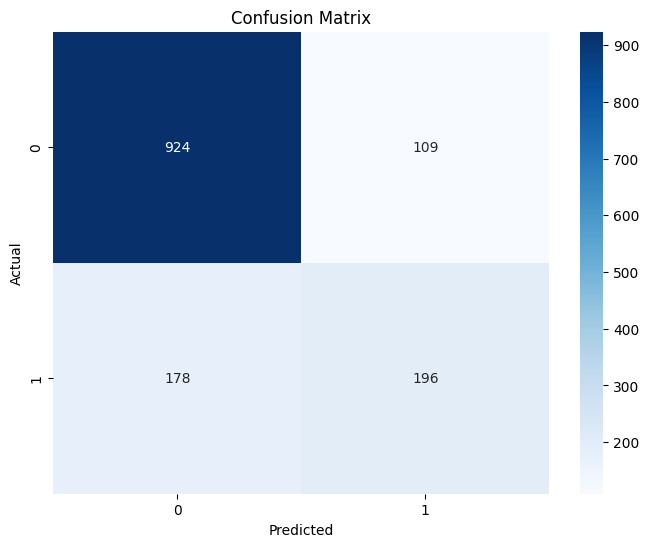

<ipython-input-16-8738d6925b27>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='Blues')


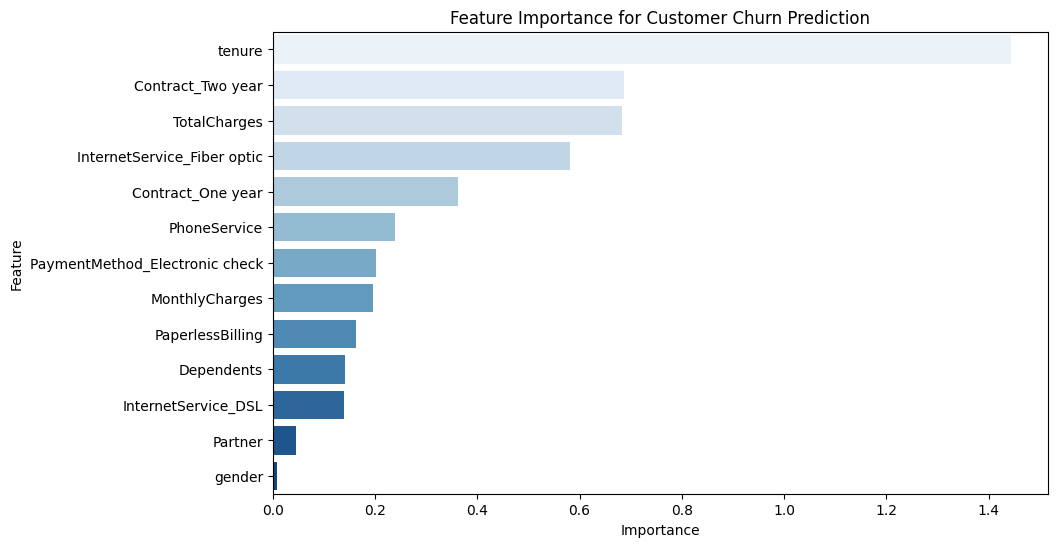

In [16]:
# Step 6: Model evaluation and insights

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Print the classification report
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print()

# Analyze feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': abs(model.coef_[0])})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='Blues')
plt.title('Feature Importance for Customer Churn Prediction')
plt.show()

In [17]:
# Remove the kaggle.json file
!rm kaggle.json
!rm -f ~/.kaggle/kaggle.json

In [18]:
# Check if the files were successfully removed
!ls ~/.kaggle
!ls | grep kaggle.json

## Data Analysis Summary

### Key Findings:
1. **Customer Tenure Impact**
   - Customers with shorter tenures are more likely to churn
   - Long-term customers show significantly higher loyalty

2. **Contract Type Influence**
   - Month-to-month contracts have the highest churn rate
   - Two-year contracts show the lowest churn rate
   - Contract length is strongly correlated with customer retention

3. **Service Relationships**
   - Fiber optic service shows significant correlation with churn
   - Monthly charges impact churn decisions
   - Total charges correlate with tenure

### Model Performance
Logistic Regression Model:
- Accuracy: 80%
- Better at predicting non-churners than churners

## Business Recommendations

### 1. Contract Strategy
- **Short-term Action**: Launch a promotion offering discounted rates for 1-2 year contracts
- **Long-term Strategy**: Develop a tiered loyalty program rewarding longer commitments

### 2. Early Customer Retention
- Implement comprehensive onboarding program
- Conduct satisfaction surveys at 30, 60, and 90 days
- Provide dedicated support for first 6 months

### 3. Service Enhancement
- Review and optimize fiber optic service delivery
- Implement proactive service quality monitoring
- Develop personalized service packages based on usage patterns

## Implementation Priority
1. **High Priority** (Immediate Implementation)
   - Launch contract conversion promotions
   - Start enhanced onboarding program
   
2. **Medium Priority** (3-6 months)
   - Develop loyalty program
   - Implement service quality monitoring
   
3. **Long-term** (6-12 months)
   - Roll out personalized service packages
   - Establish comprehensive customer feedback system

## Expected Impact
- Reduction in monthly churn rate
- Increased contract upgrades
- Improved customer satisfaction scores
- Higher customer lifetime value

## Monitoring Framework
- Monthly churn rate by contract type
- New customer retention rates
- Contract conversion rates
- Customer satisfaction metrics